# Introduction 

The “Christina Corona 4 NC” campaign has contracted with the Research Triangle Science team for advisory work related to the candidate’s crime reduction policy proposals for her 1994 NC Senatorial campaign. Specifically, we evaluate whether strategies to a) increase the certainty of arrest/conviction and b) that address racial inequalities, can deter crime. The campaign provided RTS with recent NC county geographic, demographic, economic, and law enforcement data gathered and published by Christopher Cornwell and William N. Trumbull. Below, RTS summarizes insights derived from this dataset, including recommendations for Ms. Corona’s policy team.

## Executive Summary:

**Policy Recommendations**

RTS would like to investigate and identify leading factors that contribute to crime rate while ensuring these factors can develop into actionable policies and agendas for Ms. Corona’s upcoming campaign.The RTS team dug into the data, sometimes validating and sometimes rejecting our initial intuition. We formulated many possible theories regarding the causes of crime in North Carolina, and explored many potential crime-reduction approaches based on our exploratory data analysis. 

To be fully transparent, we developed and refined the following hypotheses while investigating this dataset. 

NULL hypothesis: $H_0: \beta_{prbarr} = 0, \beta_{prbconv} = 0, \beta_{pctmin80} = 0$
<br>vs
<br>Alternative hypothesis: $H_a: \beta_{prbarr} \neq 0, \beta_{prbconv} \neq 0, \beta_{pctmin80} \neq 0$

Where 
* prbarr is probability of arrest, calculated as the county-by-county ratio of arrests to offenses recorded;
* prbconv is probability of conviction, calculated as the county-by-county ratio of convictions to arrests;
* pctmin80 is county-by-county percent of population who were recorded as minorities in the 1980 census.

We ultimately built 3 linear regression models to best explain the variation seen in crime rates across 90 NC counties (the campaign can review these in detail in the Model Comparison section below), and to test the above hypothesis. With the 3 models, we were able to consistently reject the null hypothesis at level 0.05 while explaining more and more of the variation in state-wide crime rates; we also control for various confounding factors so that our estimates do not capture spurious relationships thus we feel confident in making the below suggestions to the Christina Corona 4 NC campaign.

**Final Policy Recommendations for Crime Rate Reduction:**
<br>It is from our most efficient & effective model (model2) that we derive the following 3 policy recommendations as having the best chance to win public backing during Ms. Corona’s campaign as well as achieve real progress in crime reduction once she begins her service in the NC Senate. 

Top 3 Recommended Law Enforcement Policies: 

**Aim to increase probability of arrest state-wide**
* Statistical significance: our models found log(prbarr) to be a consistently significant predictor of log(crmrte) at the 1% level (alpha = 0.01); these estimates are robust to model specification.
* Practical significance: Our models suggest a constant elasticity relationship between the probability of arrest and the crime rate, meaning a 1 percent increase in the probability of arrest should lead to a 0.7 percent decrease in the crime rate. The RTS team theorizes that potential criminals with little exposure to the justice system view public arrests as a more compelling deterrent, versus some of the other measures like probability of being sentenced to prison (once already caught). Public arrests also increase the perception of law and order in the community.
* Policy recommendation ideas: A campaign position should be to make the police force more efficient and effective at arresting criminals, because this study has controlled for the existing size of police workforces. Ms. Corona’s policy team may want to evaluate ideas such as: increased police training budget, investment in forensic skills, tools, and capacity (for instance, to process rape kits faster), statewide implementation of a phone-based public tip-off line with cash rewards for information leading to arrests, increased video surveillance in problematic areas, etc.

**Invest to improve counties’ probability of conviction**
* Statistical significance: our models found prbconv to be another consistently significant predictor of log(crmrte) at the 0.1% level (alpha 0.001),  these estimates are robust to model specification..
* Practical significance: Criminals may not expect to be caught, but - once caught - the probability of conviction certainly has a practical effect on the crime rate. If the right person is apprehended and convicted, crimes may be prevented because criminals are (presumably) behind bars - without opportunity to re-offend. Potential criminals may also see peers get convicted and may be deterred by the difficulties faced once one has a criminal record. Our model suggests that a 1 percentage point increase in probability of conviction should lead to a 0.9 percent decrease in crime rate. 
* Policy recommendation ideas: the campaign may want to focus specifically on strengthening cases for top-pareto offense types (for instance, securing budget to staff 24/7 on-call judges would enable NC to become a “no-refusal” state with regard to DWI stops, as police would be able to get immediate approval to collect blood samples before evidence disappears). Additional budget would also enable counties to hire better prosecutors, expert witnesses, and train their forensics teams in the newest techniques. Video surveillance equipment at public facilities or even at high-crime intersections could go a long way toward gathering evidence that juries (and the public) would find compelling.

**Propose policies to mitigate positive correlation between crime rate and pctmin80**
* Statistical significance: our models found pctmin80 to be yet another consistently significant predictor of log(crmrte) at the 0.1% level (alphas 0.001), these estimates are robust to model specification.
* Practical significance: Our model suggests that a 1 percentage point increase in proportion of minorities within a given county may lead to a 1.3 percent increase in crime rate; a high proportion of minorities is thus predictive of overall crime rate. We do not believe that being a minority has a causal impact on crime. Rather, we think that this variable proxies for the impact of systematic racism in employment in driving crime rates. The exact size of the estimate is less important here than the direction and statistical significance, as it suggests an opportunity for Ms Corona to invest in equal opportunity employment law enforcement to help minorities find jobs. A situation with no discrimination would imply a small, non-significant coefficient on minorities (when controlling for other confounding factors); we would ideally like to see this coefficient disappear to zero. 
* Policy recommendation ideas: RTS recommends that Ms. Corona’s campaign focuses on increasing the enforcement of Equal Opportunity employment law, which could help minorities especially to find legal employment; unconscious bias training & public education campaigns; tip-line for residents who suspect racial bias in hiring (see Appendix showing minorities receiving significantly fewer job offers).

## Data Loading: Preparation and Cleaning

In [1]:
if(!require(ggplot2)){ install.packages("ggplot2");library(ggplot2)}
if(!require(lmtest)){install.packages("lmtest");library(lmtest)}
if(!require(sandwich)){install.packages("sandwich");library(sandwich)}
if(!require(purrr)){install.packages("purrr");library(purrr)}
if(!require(car)){install.packages("car");library(car)}
if(!require(stargazer)){install.packages("stargazer");library(stargazer)}
if(!require(tidyr)){install.packages("tidyr");library(tidyr)}
if(!require(PerformanceAnalytics)){
    install.packages("PerformanceAnalytics");library(PerformanceAnalytics)}
if(!require(IRdisplay)){install.packages("IRdisplay");library(IRdisplay)}

Loading required package: ggplot2
Loading required package: lmtest
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich
Loading required package: purrr
Loading required package: car

Attaching package: ‘car’

The following object is masked from ‘package:purrr’:

    some

Loading required package: stargazer

Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 

Loading required package: tidyr
Loading required package: PerformanceAnalytics
Loading required package: xts

Attaching package: ‘PerformanceAnalytics’

The following object is masked from ‘package:graphics’:

    legend

Loading required package: IRdisplay


In [2]:
setwd("/Users/lancemiles/Documents/UC Berkeley/Statistics/Lab/Lab 3")
options(stringsAsFactors = F)
crime_data = read.csv("crime_v2.csv")

## Data Cleaning
In preparation for our analysis, the RTS consulting group has loaded the data and removed a total of seven rows of data. We detected 6 rows of data that contained only NA values and 1 row that was clearly a duplication of data.

### Removal of NA Values
It appears that all values are missing for several counties so it is safe to remove these entire rows.

In [3]:
ok = complete.cases(crime_data)
crime_dirty = crime_data[ok,]
nok = sum(!ok)
n = nrow(crime_dirty)
paste("After removing", nok," rows with NA values the data contains", 
      n, "observations")
paste("Percentage of Rows Containing NAs =", 
      round(sum(!ok)/n * 100, digits = 2), "%")

[1] "After removing 6  rows with NA values the data contains 91 observations"

[1] "Percentage of Rows Containing NAs = 6.59 %"

### Unique Values
There is 1 case that appears to be a duplicate result, so we will need to remove any duplicate data.

In [4]:
crime_dirty = unique(crime_dirty)
new.n = nrow(crime_dirty)

paste("After removing non-unique rows, we now have", new.n," rows of data.")

[1] "After removing non-unique rows, we now have 90  rows of data."

### Making Units Consistent
There appears to be a handful of variables (prbconv, prbarr, prbpris, and pctymle) where the values are expressed as a proportions rather than percent(0.XX vs. XX). To keep the analysis clean and interpretations consistent, we are transforming these proportions to take on percentage values. This will also allow us to evaluate a 1 unit increase in each of the coefficients rather than a 0.01 unit increase.

It is also important to note that prbconv needs to converted into a numeric variable.

In [5]:
crime_dirty$prbconv = as.numeric(crime_dirty$prbconv) * 100
crime_dirty$prbarr = crime_dirty$prbarr * 100
crime_dirty$prbpris = crime_dirty$prbpris * 100
crime_dirty$mix = crime_dirty$mix * 100
crime_dirty$pctymle = crime_dirty$pctymle * 100

### Subsetting Data to Focus on Key Exploratory Variables and Covariates
Upon reviewing the number of times each county comes up, we found that each row is a different county code (code/output not shown). For this reason, we will be removing this extraneous information from our analysis. We will be focusing our analysis on the following subset of variables.

In [6]:
crime = crime_dirty[, c("crmrte","prbarr","prbconv","polpc",
                        "density","taxpc","pctmin80", "county")]

# Data Exploration - Outcome Variable, Explanatory Variables and Covariates
In preparation for the model building steps, the RTS group will be conducting a univariate and bivariate analysis of key explanatory variables as well as covariates we plan to explore in the linear regression portion of this report. It is important to note that the RTS consulting group has taken an iterative approach to model building as these data were not collected by our team. We will be focusing the body of our report on the key explanatory variables and key covariates that we have identified.

Please refer to the appendix for a description on covariates that RTS did not use in our linear regressions.

## Summary of Data
Looking at the summary output, below, the mean and median values are fairly similar to each other for all variables. In order to evaluate whether or not there is a skew, we will need to review the histograms, which will be discussed in detail, later. We see that some of the variables take on very low values (polpc and density). In particular, density takes on a particularly low value (0.00002) that is many of orders of magnitude away from the median. This may be a single rural county, but further analysis will be required to evaluate this datapoint.

In [7]:
summary(crime)

     crmrte             prbarr           prbconv            polpc          
 Min.   :0.005533   Min.   :  9.277   Min.   :  6.838   Min.   :0.0007459  
 1st Qu.:0.020604   1st Qu.: 20.495   1st Qu.: 34.422   1st Qu.:0.0012378  
 Median :0.030002   Median : 27.146   Median : 45.170   Median :0.0014897  
 Mean   :0.033510   Mean   : 29.524   Mean   : 55.086   Mean   :0.0017080  
 3rd Qu.:0.040249   3rd Qu.: 34.487   3rd Qu.: 58.513   3rd Qu.:0.0018856  
 Max.   :0.098966   Max.   :109.091   Max.   :212.121   Max.   :0.0090543  
    density            taxpc           pctmin80          county     
 Min.   :0.00002   Min.   : 25.69   Min.   : 1.284   Min.   :  1.0  
 1st Qu.:0.54718   1st Qu.: 30.73   1st Qu.:10.024   1st Qu.: 51.5  
 Median :0.97925   Median : 34.92   Median :24.852   Median :103.0  
 Mean   :1.43567   Mean   : 38.16   Mean   :25.713   Mean   :100.6  
 3rd Qu.:1.56926   3rd Qu.: 41.01   3rd Qu.:38.183   3rd Qu.:150.5  
 Max.   :8.82765   Max.   :119.76   Max.   :64.348   M

## Crime Rate - Outcome Variable
Crime rate is the outcome of interest. Our analysis is intended to inform how the political campaign should establish their policy positions to reduce crime in NC counties. We want to evaluate what kinds of policy measures will be effective in doing so. When reviewing our analysis, it is important to note that crime rates may be under-reported as the true number of offenses is likely unknowable in the population.

### Histogram of Crime Rate Variables
As we can see in **Figure 2.2.1**, the crime rate variable has a strong positive skew. Taking the log transformation of crime rate (**Figure 2.2.1**) provides a much nicer, normally distributed dataset. Log transforming the variable will improve ease of interpretability/plausibility. Candidates are likely more interested in relative improvements to baseline, so % changes will better capture this idea and be more easily interpretable to their audience. For these reasons, we may want to consider log transforming this outcome variable in our regression analysis. We are unable to confirm whether or not this is the path we should proceed with until reviewing and comparing diagnostic plots in the regression models.

[1] "Figure 2.2.1: Histogram of Crime Rate and Log Crime Rate"

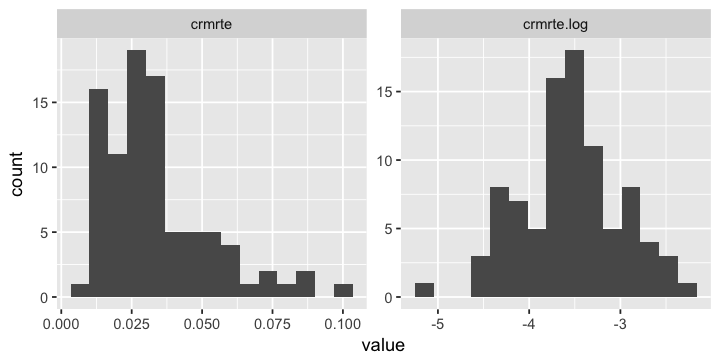

In [8]:
options(repr.plot.width=6, repr.plot.height=3)
crime.s = subset(crime, select = c(crmrte) )
crime.s$crmrte.log = log(crime.s$crmrte)
paste("Figure 2.2.1: Histogram of Crime Rate and Log Crime Rate")
crime.s %>% keep(is.numeric) %>% gather() %>% ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") + geom_histogram(bins = 15)

## Data Exploration: Histograms of Key Explanatory Variables

In preparation for the model building process, RTS will review the histograms of each of the key explanatory variables, as well as the log transformed iteration of variables that seem to have a skew.

[1] "Figure 2.3: Histogram of Explanatory Variables and Log Transformed Explanatory Variables"

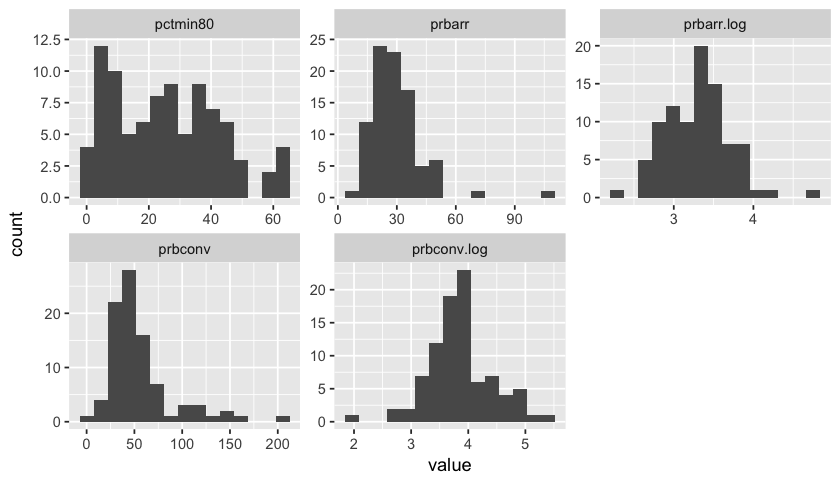

In [9]:
options(repr.plot.width=7, repr.plot.height=4)
#Code Adapted from: #https://www.r-bloggers.com/quick-plot-of-all-variables/
crime.d = subset(crime, select = -c(crmrte, county, taxpc, polpc, density) )
crime.d$prbarr.log = log(crime$prbarr)
crime.d$prbconv.log = log(crime$prbconv)
paste("Figure 2.3: Histogram of Explanatory Variables and Log Transformed Explanatory Variables")
crime.d %>% keep(is.numeric) %>% gather() %>% ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") + geom_histogram(bins = 15)


### Probability of Arrest - Explanatory Variable
Probability of arrest is one of the leading candidate explanatory variables for our crime rate analysis as the RTS consulting group seeks to understand how the effectiveness of the police force modulates crime rate. We speculate that the probability of arrest may best proxy for the concept of "certainty of punishment" as a deterrent. This is because it is most easily observed to a would-be criminal, while the other probability variables are less well observed. Indeed, we see that the probability of arrest is strongly negatively correlated with crime rate (see **Figure 2.5**, below).

At the same time, we are aware of reasons why this estimate may not be causal. This could be because the number of offenses are higher in these communities, but could also be due to the types of crimes committed in these counties. For instance, these locations may have a higher frequency of vandalism, which may occur more frequently and may not have any witnesses therefore making an arrest may be more difficult than a robbery. Moreover, it is important to note that there may be an under-reporting of offenses, which would suggest that the true prbarr is possibly overstated. Nevertheless, we still think that we can adequately posit some relationship between increasing the probability of arrest and the crime rate.  

#### Histogram of Probability of Arrest
The histogram for the probability of arrest (**Figure 2.3**) reveals a few outliers and a slight right skew. Prbarr has one outlier with a value > 100. This is technically possible even though the variable is defined as a probability (as police officers may make multiple arrests for the same offense). Upon further investigation, this county also has a low crime rate, suggesting that the total number of offenses may be low (ceteris paribus).

The log transformed iteration of probability of arrest (**Figure 2.3**) reveals a nicer, more normal, distribution. During the model building process, we may consider log transforming this variable, but we will need to further investigate the diagnostic plots in order to understand whether or not this transformation is appropriate.

### Probability of Conviction - Explanatory Variable
In this dataset, it is important to note that we are assuming the probability of conviction variable, which is the number of convictions over arrests, measure the effectiveness of our judicial system after an individual is arrested. RTS recognizes that not every individual who is arrested is either guilty or proven guilty of a crime. While we would not expect this variable to take on a mean or median value of 1 or greater, we would expect this variable to take on values closer to 1 if the judicial system is both effective and efficient.  The RTS consulting group feels that the probability of conviction strongly influences crime rate. We feel that this ought to deter would-be criminals (otherwise arrests have no "teeth"), and indeed the probability of conviction is negatively correlated with crime rate in our exploratory plots (see **Figure 2.5**, below).

#### Histogram of Probability of Conviction
As we can see in the histograms, the probability of conviction has a strong right skew, with 10 data points that take on a value greater than 100 (**Figure 2.3**). Once again, we may consider log transforming this variable as this provides a nicer normal distribution (**Figure 2.3**). Ultimately we will need to review the diagnostic plots when building the models for predicting crime rate to understand whether or not the log transformation captures the linear relationship between probability of conviction and crime rate. 

### Percent Minority (1980) - Explanatory Variable
The percentage of minorities in a county may have a significant impact on crime rate because of systematic inequalities that reduce the economic opportunities for minorities. This makes crime more attractive. Comparing counties with the highest crime rate (4th quartile) against counties with the lowest crime rate (1st quartile) revealed a stark difference in median percent minority (10.006 versus 26.3814, respectively). Although these data are not current (data from 1980), we feel that the percentage of minorities in a given county likely has not changed drastically in less than one familial generation. We find that this is moderately positively correlated with crime in our exploratory plots and decide to include it in our ideal model specification (see **Figure 2.5**, below).

#### Histogram of Percent Minority (1980)
As we can see in the histogram (**Figure 2.3**), we have a uniformly distributed dataset with a slight positive skew. The log transformation did not reveal a better distribution (**data not shown**) so it is unlikely that RTS will pursue log transforming these data.

## Data Exploration: Histograms of Key Covariates

In preparation for the model building process, RTS will review the histograms of each of the key covariates, as well as the log transformed iteration of variables that seem to have skew and may be a good candidate for log transformation.

[1] "Figure 2.4: Histogram of Covariates and Log Transformed Covariates"

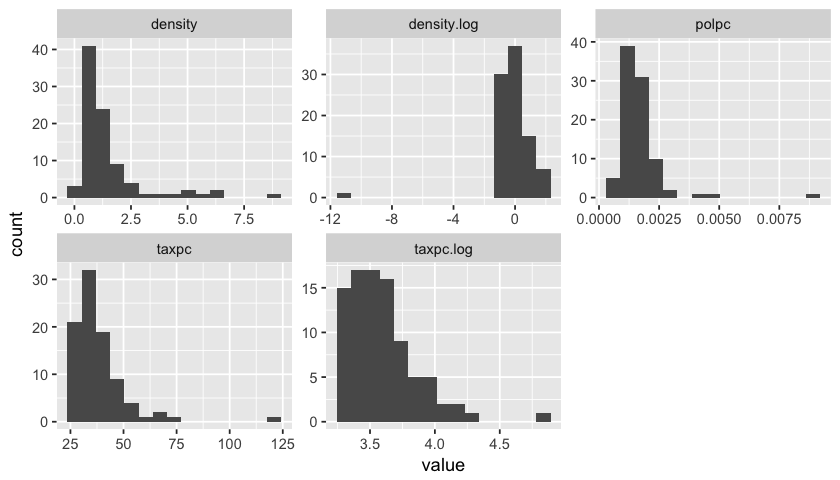

In [10]:
options(repr.plot.width=7, repr.plot.height=4)
#Code Adapted from: #https://www.r-bloggers.com/quick-plot-of-all-variables/
crime.e = subset(crime, select = -c(crmrte, county, prbarr, prbconv, pctmin80) )
crime.e$taxpc.log = log(crime$taxpc)
crime.e$density.log = log(crime$density)
paste("Figure 2.4: Histogram of Covariates and Log Transformed Covariates")
crime.e %>% keep(is.numeric) %>% gather() %>% ggplot(aes(value)) +
    facet_wrap(~ key, scales = "free") + geom_histogram(bins = 15)

### Police Per Capita - Covariate
Including police per capita captures the police presence and normalizes for the population the police serves in a given county. As observed previously, among higher crime counties we saw an increase in police per capita. This is likely because the increase in police force is an artifact of where crime resides rather than how effective NC counties are at combating crime. In addition, RTS believes that an increased police presence will result in a higher number of arrests, and we note a positive correlation in the two variables in our EDA. For these two reasons, incorporating this covariate will help minimize bias in our estimates (see **Figure 2.5**, below).

#### Histogram of Police Per Capita
In **Figure 2.5** we clearly observe an outlier as well as a right skew in the data. As a result, we will consider log transforming police Per capita in the model building process (**Figure 2.4**), but will need to evaluate the diagnostic plots to understand whether or not a log transformation is appropriate.

### Tax Per Capita - Covariate
Tax per capita is a reasonable proxy for wealth, which may attract crime as well as offer a means to pay for more police in a given county. We also believe that tax per capita captures some omitted variable bias by proxying for unemployment and average wage. Including the tax per capita variable in our analysis could allow us to minimize bias in our explanatory variables because it is positively correlated with crime rate and negatively correlated with log(prbarr) and prbconv (see **Figure 2.5**, below). Including tax per capita in our model improves the overall precision of the estimates by reducing the unexplained variation in crime rate. There is one large outlier (119 taxpc). Upon further investigation, this may be a wealthy county - the proportion of minorities and young men is low and there may also be some concentration of very wealthy individuals.

#### Histogram of Tax Per Capita
The histogram of tax per capita reveals a clear right skew in the data(**Figure 2.4**). Taking the log transform of tax per capita helps bring the skew in slightly (**Figure 2.4**), we do not get a nice normal distribution. RTS plans to review the diagnostic plots to see if log transforming these data is appropriate. 

### Density - Covariate
Density is a more precise measure of the "urbanness" of a county and can allow us to minimize bias in the probability of arrest. It is likely that crime rates are higher in areas that are more densely populated. In a heavily populated area the frequency in which crimes like petty theft, robbery, and vandalism occur is likely higher than counties that are less populated. This increases the number of offenses that occur in a county as well as increase the crime rate. However, it may be more difficult to arrest criminals in densely populated areas because it is more challenging to catch them; and it may be more difficult to convict criminals because it may be more challenging to gather quality evidence (more anonymity in larger, denser areas). We find that density is strongly correlated with crime and negatively correlated with the log of probability of arrest/conviction (see **Figure 2.5**, below). This suggests that density will help minimize bias in our coefficients.

#### Histogram of Density
In **Figure 2.5** we clearly observe a few outliers on both ends of the curve as well as a right skew in the data. Although log transforming this variable is tempting, we will need to be careful as density takes on a single, very low, value of 0.00002. As we can see in **Figure 2.4**, taking the log transformations causes the single county with a low density value to become a serious outlier. As a result, we may consider log transforming density, but we will really need to evaluate this in the model building process upon reviewing diagnostic plots.

## Bivariate Analysis of Outcome Variable, Key Explanatory Variables and Key Covariates
RTS would like to investage the bivariate relationship between crime rate, key explanatory variables and covariates of interest.

[1] "Figure 2.5: Scatter Plot Matrix and Correlation Matrix of Variables"

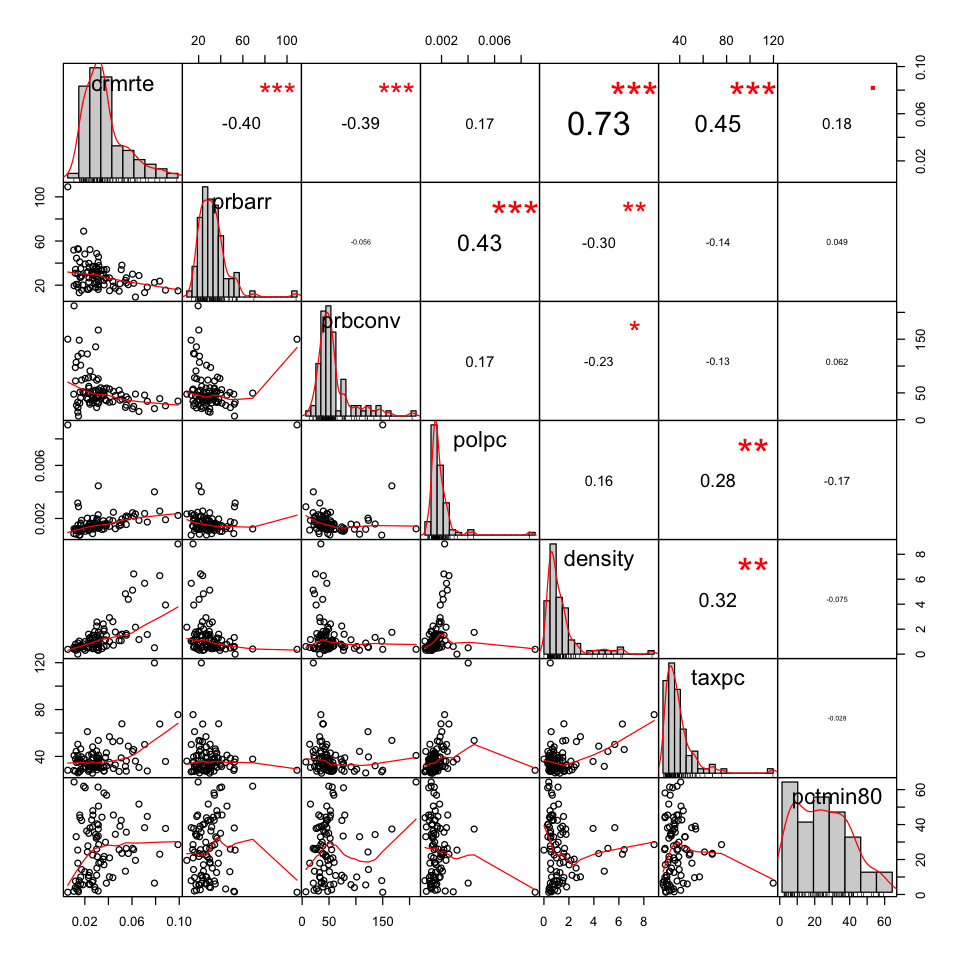

In [11]:
options(repr.plot.width=8, repr.plot.height=8)
df = subset(crime, select = -c(county) )
paste("Figure 2.5: Scatter Plot Matrix and Correlation Matrix of Variables")
suppressWarnings(chart.Correlation(df, method = c("pearson")))

### Correlation Matrix
The correlation matrix , which is the upper right half of the chart in **Figure 2.5** provides important information on relationships between crime rate and our variables of interest. 

As we can see in the upper right half of **Figure 2.5**, there are moderately strong to strong correlations (0.3+) between crime rate and probability of arrest (-0.4), probability of conviction (-0.39), density (0.73), and tax per capita (0.45); this validates our decision to include them in our ideal model.

We also observed a few weaker correlations (0.1 - 0.3) between crime rate and police per capita (0.17), and percent minority 1980 (0.18). The RTS consulting group found the correlation between percent minority 1980 and crime rate particularly interesting. Although this variable was generated from historical data (1980), we believe that there is still important information to be gleaned when seeking to understand the relationship between the population of minorities in each county and crime rate. We also found the positive correlation between police per capita and crime rate very interesting. As stated earlier, the RTS consulting group expected this to be a negative correlation as we felt more police officers would lead to less crime. The positive correlation suggests that police per capita may be a proxy for another measure. For instance, instead of being a measure of how effective the police force is, this may be a measure of where crime tends to reside.

Equally important, we observe strong correlations among our explanatory variables and covariates. Tax per capita had a moderately strong correlation with police per capita (0.28). As we noted earlier, tax per capita is highly correlated with crime rate. The correlation between tax per capita and police per capita may be due to collinearity because counties with more money attract more crime and counties with more money may have the power to hire more law enforcement officers. Of note, we found that police per capita had a strong correlation with probability of arrest (0.43). Density is strongly correlated with probability of arrest (-0.3) and tax per capita (0.32), and is moderately correlated with probability of conviction (-0.23).

### Scatter Plot Matrix of Variables of Interest
The bottom left half of **Figure 2.5** is the scatter plot matrix of our outcome variable, key explanatory variables, and key covariates. Reviewing the scatterplot matrix has revealed some interesting relationships in the data that provide more context for the correlation plot discussed in **Section 2.5.1**. 

In **Figure 2.5** RTS observed a couple of variables that seem to contain strong outliers, which clearly affect the line that fits the bivariate relationship between each variable. These outliers likely skewed our interpretation of the correlation coefficients from earlier in **Section 2.5.1**. Of note, police per capita and density clearly contain outlier communities that do not follow the same trends as the rest of their NC counterparts. In the police per capita variable, we observe a single county that has the largest police per capita value of all NC counties, which also happens to have the lowest crime rate of all datapoints. One reason we have observed this phenomenon could be that this is an remote county with very few people, very little crime, and a police force that is large relative to the size of the county. Another reason for observing such a datapoint could be because this is a heavily policed county and we are seeing a shift in crime rate because police presence is fierce and effective. In either case, this observation warrants further investigation. In our initial data exploration we identified a county that took on a very low density value (0.00002), which was far lower than the mean and median density values. When log transforming such a small number this can introduce a large skew in the dataset. RTS will investigate this variable further as this value is likely to hold a high amount of leverage (transformed or untransformed) in our regression models.

### Brief Investigation of Outlier NC Counties

#### Police Per Capita
As we can see in the table, below (**Table 2.5.3.1**), police per capita is over two times larger in County 115 than in County 195. RTS has noted entry 51 (county 115), which may hold relevance when reviewing the diagnostic plots from our linear regression. Although we observe this outlier county, we do not have sufficient reason to remove this entire county from this regression. Interestingly, we find that percent minority is the lowest percent minority datapoint in the dataset and crime rate is the lowest value as well. Also of note, we see that probability of arrest and probability of conviction are extremely high (> 100), which means that the county is truly efficient at arresting and convicting criminals. Given a relatively high prbconv, we suspect that crime in this county may be driven by a small number of serial offenders. There appears to be nothing immediately obvious about the density and tax per capita values.

In [12]:
paste("Table 2.5.3.1: Investigation of Police Per Capita Outlier")
paste("Counties with the highest police per capita")
head(crime[order(-crime$polpc),], 3)

[1] "Table 2.5.3.1: Investigation of Police Per Capita Outlier"

[1] "Counties with the highest police per capita"

,crmrte,prbarr,prbconv,polpc,density,taxpc,pctmin80,county
51,0.0055332,109.0910,150.0000,0.00905433,0.3858093,28.19310,1.28365,115
90,0.0313973,20.1397,167.0520,0.00445923,1.7459893,53.66693,37.43110,195
25,0.0790163,22.4628,20.7831,0.00400962,0.5115089,119.76145,6.49622,55


#### Density
In **Table 2.5.3.2**, below, we see that county 173 (row 79 in the data) has, by far, the lowest density. As noted earlier, log transforming this variable has exaggerated this relationship a bit, but we do not feel that there is sufficient evidence to assume this is an anomalous result. RTS will review the diagnostic plots from the linear regression to check whether or not this datapoint truly influences the regression.

In [13]:
paste("Table 2.5.3.2: Investigation of Density Outlier")
head(crime[order(crime$density),], 3)

[1] "Table 2.5.3.2: Investigation of Density Outlier"

,crmrte,prbarr,prbconv,polpc,density,taxpc,pctmin80,county
79,0.0139937,53.0435,32.7869,0.00316379,0.0000203422,37.72702,25.3914,173
63,0.0314610,23.8636,41.2698,0.00127115,0.3005714420,35.97390,39.8515,141
8,0.0202814,39.2111,76.9231,0.00103525,0.3009985690,34.00304,61.0540,15


# Linear Regression - Building and Evaluating Models 1, 2, and 3

**Model1 - Base Model:** 
<br>$log(crmrte) =  \beta_0 + \beta_1log(prbarr) + \beta_2prbconv + \beta_3pctmin80 + u$

Our base model contains only our key explanatory variables: log probability of arrest, probability of conviction, and percent minority (1980). We would like to estimate OLS coefficients on each of these variables so that we can separately state the partial effect on crime rate for each term. In this way, the campaign could propose a three-pronged strategy for reducing crime, knowing that each initiative could make an impact on its own, and the linear combination of the impact would be additive (or in this case, all initiatives would jointly help to lower crime rates).

**Model2 - Base Model With Key Covariates:** 
<br>$log(crmrte) =  \beta_0 + \beta_1log(prbarr) + \beta_2prbconv + \beta_3pctmin80 + \beta_4log(density) + \beta_5polpc + \beta_6log(taxpc) + u$

Our recommended model includes our key explanatory variables from the prior model (log probability of arrest, probability of conviction, and percent minority) as well as covariates, which parsimoniously increase the accuracy of the regression: log tax per capita, log density , and police per capita.

**Police per capita:** There is a strong positive correlation between this variable and crime rate. We also observe a strong positive correlation between police per capita and probability of arrest. Higher police presence may be endogenous with a culture of more serious crimes and increase the arrest rate, ceteris paribus.

**Density:** Densely populated areas are more likely to have more crime because there is more incentive to do so (e.g. theft, petty crimes, vandalism). Density is negatively correlated with crime rate, suggesting that it might be easier for criminals to "blend in". It may also be more challenging for law enforcement officials to gather evidence to convict someone in a more densely populated area. This covariate is an important variable for minimizing bias in log probability of arrest and in the probability of conviction.

**Tax per capita:** We initially thought that $log(taxpc)$ would be negatively correlated with crimes. However, we found in the data that it is positively correlated. One possible interpretation is that the composition of crimes may skew towards petty crimes when the crime rate is high and the tax per capita is high (i.e. there's more to steal in wealthy neighborhoods). RTS initially hypothesized that $log(taxpc)$ would be positively correlated with the log probability of arrest since more well-funded counties may have a larger police presence. However this is not the case in this sample, there is no strong correlation, suggesting that the inclusion of this variable will be more likely to improve precision, instead. 

**Model3 - Kitchen Sink Model:**
<br>$log(crmrte) =  \beta_0 + \beta_1log(prbarr) + \beta_2prbconv + \beta_3pctmin80 + \beta_4log(density) + \beta_5polpc + \beta_6log(taxpc) + \beta_7prbpris + \beta_8avgsen + \beta_9pctymle + \beta_{10}wcon + \beta_{11}wtuc + \beta_{12}wtrd + \beta_{13}wfir + \beta_{14}wser + \beta_{15}wmfg + \beta_{16}wfed + \beta_{17}wsta + \beta_{18}wloc + \beta_{19}mix + u$

This is a reference model that RTS has included with very nearly all of the data available from the campaign's crime rate dataset. Generally speaking, this model illustrates the consistency of our estimated coefficients across model specifications, helping us validate further the team's recommendations to the campaign.

Before we interpret the coefficients of these three models, we must first establish whether or not these three models comply with the classical linear model assumptions, so as to be a useful estimate of the population regression function.

In [14]:
model1 = lm(log(crmrte) ~ log(prbarr) + prbconv + pctmin80, data = crime)

model2.co = lm(log(crmrte) ~ log(prbarr) +  prbconv + pctmin80 + 
               log(density) + polpc + log(taxpc), data = crime)

model3.all = lm(log(crmrte) ~ log(prbarr) +  prbconv + pctmin80 + 
                log(density) + polpc + log(taxpc) + prbpris + 
                avgsen + pctymle + wcon + wtuc + wtrd + wfir +
                wser + wmfg + wfed + wsta + wloc + 
                mix, data = crime_dirty)

**MLR.1 - Linearity in Parameters - All Models**
<br>This is a maintained assumption. In all three models, RTS has expressed the relationship of $log(crmrte)$ (dependent variable) as a linear function of the explanatory variables and covariates (independent variables). 

**MLR.2 - Random Sampling - All Models**
<br>RTS does not have much information on how this dataset was collected. Perhaps the researchers aimed to gather data from the entire population of counties in North Carolina, yet - as we are missing data on 10 counties - we now have a sample of 9 out of 10 counties. Ideally, we would like to make general claims about the causes of crime across the entire state, and we would hope that the data collected here represents the vast majority of the variation possible in the state (which should be the case if it were a random sample). Unfortunately, it's certainly possible that the missing counties have something in common that is relevant to this study. Perhaps they are not proud of their crime rates, arrest rates, and conviction rates, and so declined to report these. Or perhaps these counties failed to report due to natural disasters or other unknown circumstances. As it is, the RTS team chose to treat the data as if it were collected via random sampling, and we encourage the campaign to continue pressing for the collection of comprehensive crime data to further inform policy-making, going forward.

**MLR.3 - No Perfect Colinearity - All Models**
<br>The scatter plots among variables of interest (**Figure 2.5**) establish that there is no perfect multicollinearity. Additionally, the regression in R is able to estimate all parameters. As we can see from the outputs, below, the highest VIF value among all three models is < 3. For these reasons, it is safe to assume that we do not have perfect multicolinearity in our models.

In [15]:
paste("Model1 Variance Inflation Factors")
t(round(vif(model1),digits=2))      #VIF analysis of model 1

paste("Model2.co Variance Inflation Factors")
t(round(vif(model2.co),digits=2))   #VIF analysis of model 1 + key covariates

paste("Model3.all Variance Inflation Factors")
t(round(vif(model3.all),digits=2))  #VIF analysis of kitchen sink model

[1] "Model1 Variance Inflation Factors"

log(prbarr),prbconv,pctmin80
1.05,1.04,1.02


[1] "Model2.co Variance Inflation Factors"

log(prbarr),prbconv,pctmin80,log(density),polpc,log(taxpc)
1.37,1.21,1.09,1.18,1.3,1.18


[1] "Model3.all Variance Inflation Factors"

log(prbarr),prbconv,pctmin80,log(density),polpc,log(taxpc),prbpris,avgsen,pctymle,wcon,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix
1.91,2.38,1.35,2.43,2.42,1.6,1.45,1.79,1.45,2.18,1.74,2.93,2.66,1.56,1.99,2.91,1.62,2.38,2.04


**MLR.4 - Zero Conditional Mean**
<br>We cannot prove this point definitively for any of our models, even if we see a flat horizontal linear relationship plotting residuals versus our regression line's fitted values (since we never truly observe the error term in the population). However, we plot residual vs fitted side-by-side, below, to help compare this diagnostic plot across our 3 models, commenting on relative compliance with the ZCM assumption:

[1] "Figure 3.1: Residual vs Fitted Plots of Models"

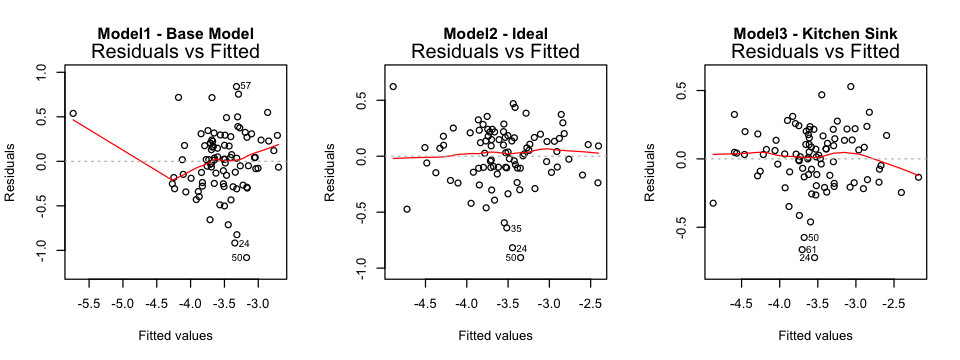

In [16]:
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow=c(1,3))
paste("Figure 3.1: Residual vs Fitted Plots of Models")
plot(model1, which = 1, main = "Model1 - Base Model")
plot(model2.co, which = 1, main = "Model2 - Ideal")
plot(model3.all, which = 1, main = "Model3 - Kitchen Sink")

**Model 1 - Base Model:**
<br>Our plot of model 1 is clearly non-linear in **Figure 3.1**. While the expectation of the error is zero near the center of mass of the dataset, there are clearly larger residuals the further you move left or right, with a positive (instead of flat) slope within the main mass of data. There's also a clear outlier on the low end of fitted values. It is important to note that earlier in the EDA we identified potential outliers in the data. In the residuals vs leverage plot (**Figure 3.4**) RTS observed that data point number 51 exhibited some leverage on the model. For the purpose of reviewing the residuals vs fitted plot, we removed row 51 (temporarily!) to see if this helped to adjust the curvature we observed in model 1's residuals-vs-fitted plot. We found that removing this single datapoint momentarily did in fact help flatten our residuals vs fitted plot(**data not shown**), but we decided it was important to include this observation in the overall analysis as there were no clear reasons to remove this outlier. Because of this deviation from the ZCM assumption with model1, we believe model1 can not yield our best unbiased estimates, and we call the reader's attention to the next model for the improvements available there.

**Model 2 - Base Model + Key Covariates:**
<br> In what became our best and recommended model, it becomes evident that the residuals-vs-fitted line actually flattens out much more with the addition to the former model of our 3 selected covariates. This suggests that model 2 helps remove variation from the error term and bring this variation into variables we can control in a ceteris paribus manner. We still see several points labeled near the bottom of the chart with larger-magnitude residuals, but the expectation of the error is still very nearly zero for these points (see below for a discussion of the spread or variance). It is a very good thing that we did not permanently remove datapoints to make model1's plot nicer, because model2 is able to accommodate all of the information in our dataset without data loss.

**Model 3 - Kitchen Sink Model:**
<br>In our kitchen sink model, we observe again a mostly-flat residual-vs-fitted plot, except that the fitted line tapers off on the right end of the plot (the very high crime rate datapoints). It is important to note that there are very few fitted values on the far right end of the plot, and we're not terribly surprised to see some larger deviations in error there. Fortunately our 2nd model doesn't suffer from this, but we include evaluation of the kitchen sink model to somewhat bound our analysis. 

**All Models:**
<br>Exogeneity is a weaker condition than Zero Conditional Mean, which can provide us consistency in the OLS estimates as n gets larger. Given that this is a relatively large data set (90 observations) and given that we desire consistency in our OLS estimates, we certainly think that the Exogeneity assumption is met, and may in fact be sufficient for our purposes in recommending law enforcement policies. RTS acknowledges that there are omitted variables in our model that may lead us to be doubtful of our stronger zero conditional mean assumption.

**MLR.5 - Homoskedasticity**
<br> Again, as we can't observe the population error directly, we use diagnostic plots to do our best to evaluate the variance of our residuals, given the values of our independent variables in the existing sample. If we had homoskedasticity, we'd expect a flat line at a constant value for the $\sqrt{\hat{\sigma}^2}$. Below, we plot side-by-side the scale-location plots for our 3 models:

[1] "Figure 3.2: Residual vs Fitted Plots of Models"

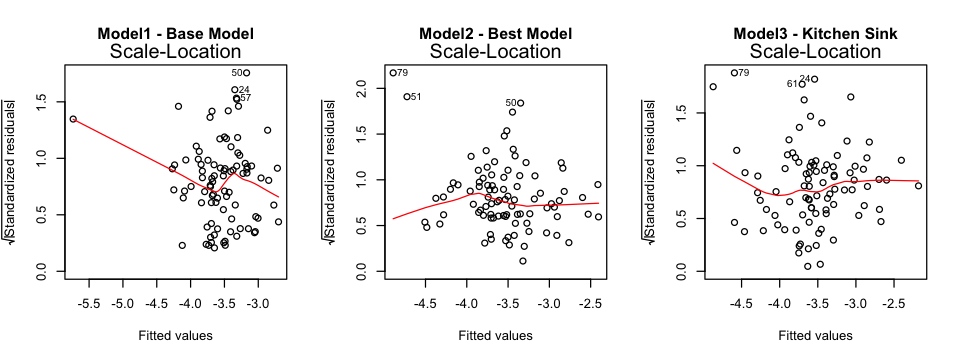

In [36]:
par(mfrow=c(1,3))
paste("Figure 3.2: Scale-Location Plots of Models")
plot(model1, which = 3, main = "Model1 - Base Model")
plot(model2.co, which = 3, main = "Model2 - Best Model")
plot(model3.all, which = 3, main = "Model3 - Kitchen Sink")

**Model 1 - Base Model:**
<br>As in the residuals-vs-fitted plot for model1, we have a single outlier on the low end of the fitted values (very low crime rate) that is illustrating much larger error variance than the majority of the dataset. Homoskedasticity would require that we can't learn *anything* about the error variance from knowledge of the fitted value, and here, that's clearly not the case. However (see below) when we run the Breusch-Pagan test with $H_0$ being that we have homoskedasticity, we fail to reject the null at any reasonable level of significance.

In [18]:
paste("Model1 - Breusch-Pagan test with null hypothesis that we have homoskedasticity:")
bptest(model1)

[1] "Model1 - Breusch-Pagan test with null hypothesis that we have homoskedasticity:"


	studentized Breusch-Pagan test

data:  model1
BP = 1.3259, df = 3, p-value = 0.723


**Model 2 - Base Model + Key Covariates:**
<br> Our second model - while certainly not flat and uniformly spread - does appear to be somewhat "more" constant than model1. Unfortunately, we were not able to adjust the axes of these side-by-side plots so visual distances would represent the same amount in each plot, so do notice that this center plot goes up to 2.0, while the others don't. This model doubles the degrees of freedom when testing with the Breusch-Pagan test, and ends up rejecting the null at a significance of 0.05, while failing to reject at 0.01. (We will be conservative and use heteroskedastic-robust error formulas.)

In [19]:
paste("Model2 - Breusch-Pagan test with null hypothesis that we have homoskedasticity:")
bptest(model2.co)

[1] "Model2 - Breusch-Pagan test with null hypothesis that we have homoskedasticity:"


	studentized Breusch-Pagan test

data:  model2.co
BP = 16.011, df = 6, p-value = 0.0137


**Model 3 - Kitchen Sink Model:**
<br> Our kitchen sink model looks most uniform of all, which makes sense in that we've moved a lot of variation from the error term into the "systematic" variation in the model. Even in this case, though, the low end of the fitted values (lower crime levels) illustrates the error variance failing to remain constant. The Breusch-Pagan test rejects that we have homoskedasticity at 0.05 significance, but fails to reject the null at 0.01.

In [20]:
paste("Model3 - Breusch-Pagan test with null hypothesis that we have homoskedasticity:")
bptest(model3.all)

[1] "Model3 - Breusch-Pagan test with null hypothesis that we have homoskedasticity:"


	studentized Breusch-Pagan test

data:  model3.all
BP = 31.23, df = 19, p-value = 0.03808


**All Models:**
<br> While we could argue that our models might be treated as homoskedastic at various levels of significance using the Breusch-Pagan test, we know that this test's results are sensitive to the number of observations in the data. The RTS team chooses to use heteroskedastic-robust error calculations, in order to make our hypothesis testing more conservative in light of other problematic areas (like not having exactly random-sampled data, and there being some omitted variable bias, see below).

**MLR.6 - Normality of Standard Errors**
<br>RTS acknowledges that we will never observe the normality of the actual error. We still review the normality of our residuals in the following Q-Q plots as well as the histograms of our model residuals, below (**Figure 3.3**). To further test normality, we looked at the shapiro-wilk test. In this case, these are the following hypotheses for this test:

$H_0:$ Residuals are drawn from a population with a normal distribution.
<br>$H_1:$ Residuals are not drawn from a population with a normal distribution.

[1] "Figure 3.3: Normal Q-Q Plots and Histogram of Residuals of Models"

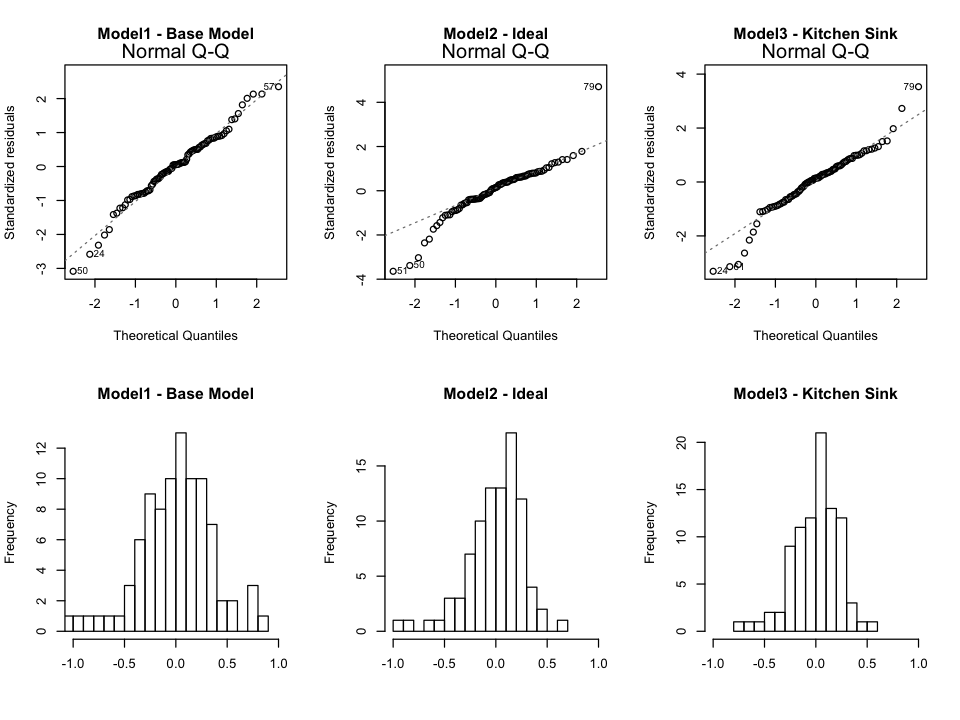

In [38]:
options(repr.plot.width=8, repr.plot.height=6)
par(mfrow=c(2,3))
paste("Figure 3.3: Normal Q-Q Plots and Histogram of Residuals of Models")
plot(model1, which = 2, main = "Model1 - Base Model")
plot(model2.co, which = 2, main = "Model2 - Ideal")
plot(model3.all, which = 2, main = "Model3 - Kitchen Sink")
hist(model1$residuals, breaks = 15, main = "Model1 - Base Model", xlim = c(-1,1), xlab = NULL)
hist(model2.co$residuals, breaks = 15, main = "Model2 - Ideal", xlim = c(-1,1), xlab = NULL)
hist(model3.all$residuals, breaks = 15, main = "Model3 - Kitchen Sink", xlim = c(-1,1), xlab = NULL)

**Model 1 - Base Model:**
<br>Looking at the Q-Q plot, histogram of the residuals, and the outputs from the Shapiro-Wilk test, we fail to reject the null hypothesis that the errors come from a normal distribution.

In [22]:
paste("Model1 - Shapiro-Wilks test with null hypothesis that we have normality in the errors:")
shapiro.test(model1$residuals)

[1] "Model1 - Shapiro-Wilks test with null hypothesis that we have normality in the errors:"


	Shapiro-Wilk normality test

data:  model1$residuals
W = 0.98239, p-value = 0.2638


**Model 2 - Base Model + Key Covariates:**
<br>The Q-Q plot and histogram of residuals shows that the residuals may not be normally distributed. The Shapiro-Wilk normality test allows us to reject the null hypothesis at the 0.01 level.

In [23]:
paste("Model2 - Shapiro-Wilks test with null hypothesis that we have normality in the errors:")
shapiro.test(model2.co$residuals)

[1] "Model2 - Shapiro-Wilks test with null hypothesis that we have normality in the errors:"


	Shapiro-Wilk normality test

data:  model2.co$residuals
W = 0.95569, p-value = 0.00382


**Model 3 - Kitchen Sink Model:**
<br>The Q-Q plot and histogram of residuals shows that the residuals may not be normally distributed. The Shapiro-Wilk normality test allows us to reject the null hypothesis at the 0.05 level.

In [24]:
paste("Model3 - Shapiro-Wilks test with null hypothesis that we have normality in the errors:")
shapiro.test(model3.all$residuals)

[1] "Model3 - Shapiro-Wilks test with null hypothesis that we have normality in the errors:"


	Shapiro-Wilk normality test

data:  model3.all$residuals
W = 0.96731, p-value = 0.02294


**All Models:**
<br>Although the residuals may not be normally distributed, given our sample size of 90 observations, the central limit theorem tells us that our coefficients have an asymptotically normal sampling distribution. 

**Further Discussion on Outliers**
<br> The residuals vs leverage plot (**Figure 3.4**) has revealed a few rows of data that may be exerting influence over our regression.  We see that data entry row 51, county number 115, shows up in all three plots.  We also observe that data entry number 79 (county 173) shows up in models 2 and 3.  As discussed previously,  county 115 has a strong police presence and is clearly an outlier in many regards(**Section 2.4.2**).  County number 173 also had an unusually low population relative to all other counties inNC.

**Model 1 - Base Model:**
<br>As we can see from the plot,  county 115 exhibits some leverage on the overall model.   Although the cooks distance is less than 0.5,  it clearly does skew our results a bit.   We have no substantial basis to assume this datapoint is erroneous and do not feel that we have sufficient justification to remove this datapoint from our analysis. 

**Model 2 - Base Model + Key Covariates:**
<br>In model 2, county 173 and county 115 have high leverage and the cooks distances that are greater than 1. It is interesting to see that these two datapoints are on opposite ends of the standardize residuals, effectively negating the "influence" these two counties exert on the regression. 

**Model 3 - Kitchen Sink Model:**
<br>In model 3, we see that there are 3 datapoints that may exert influence over the model.  Data entry number 84 (county 185) may be exerting influence over our model estimates in tandem with county 173.  When investigating county 185 further, we observed that this county had the highest probability of conviction of any county.  Although this county may be an outlier, we do not have sufficient justification for removing any data points from our regression.

**All Models:**
<br>We clearly see that there are potentially influential datapoints in models 2 and 3, which may be altering our results. It is possible that removing these datapoints will increase our $R^2$ and improve our overall fit, but RTS has not identified a truly justifiable means for removing these datapoints, so for the purpose of this analysis RTS plans to keep these data in the regression.

[1] "Figure 3.4: Residuals vs Leverage Plots of Models"

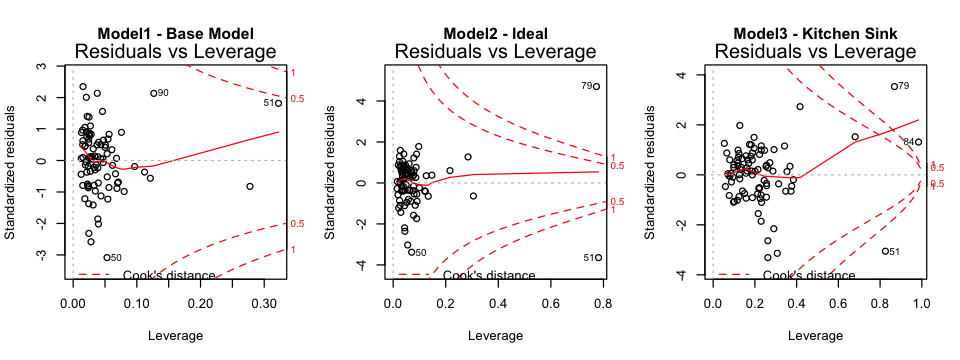

In [37]:
options(repr.plot.width=8, repr.plot.height=3)
par(mfrow=c(1,3))
paste("Figure 3.4: Residuals vs Leverage Plots of Models")
plot(model1, which = 5, main = "Model1 - Base Model")
plot(model2.co, which = 5, main = "Model2 - Ideal")
suppressWarnings(plot(model3.all, which = 5, main = "Model3 - Kitchen Sink"))

## Model and Beta Coefficient Interpretations
Now that RTS has reviewed the 6 MLR assumptions for our three models, we will evaluate the model outputs as well as the $\hat{\beta}$ coefficients for our ideal model, which is model 2.

### Comparing $R^2$ and AIC Values
Model 1's $R^2$ value is 0.584, which means that 58.4% of the variations in dependent variable Y are explained by the independent variables in the model. With the inclusion of three covariates to model 1 (model2), the AIC value reduces from 77.53 to 33.57 while increasing $R^2$ to 0.761. The kitchen sink model has a slightly better AIC than model 2 (28.02), and the $R^2$ increases, slightly, to 0.832. When comparing models 1 and 2 to the kitchen sink model, we feel that model 2 have captured key relationships in the data while maintaining parsimony.

In [26]:
AIC.1 = AIC(model1)
AIC.1.co = AIC(model2.co)
AIC.1.all = AIC(model3.all)
      
print(paste("The AIC value of Model 1 with only key explanatory variables is", AIC.1))
print(paste("The AIC value of Model 2 with base model plus key covariates is", AIC.1.co))
print(paste("The AIC value of the Kitchen Sink model is", AIC.1.all))

[1] "The AIC value of Model 1 with only key explanatory variables is 77.526397291133"
[1] "The AIC value of Model 2 with base model plus key covariates is 33.5686036974908"
[1] "The AIC value of the Kitchen Sink model is 28.01892028164"


### Evaluating the $\beta$ Coefficients
We evaluate the regression coefficients in a stargazer table, below (**Table 3.1.2**). It is important to note that because we observed heteroskedasticity in our models, RTS has decided to use robust standard errors. Also, for the purpose of interpreting 1 unit increases in probabilities, these variables were converted to percentages rather than proportions.
 
**log(prbarr)**

We assumed the relationship could be modeled as an elasticity. As we can see in the stargazer outputs, $\hat{\beta}_1$ coefficient for the natural log of probability of arrest is significant at the 1% level in all three models. The magnitude of $\hat{\beta}_1$ remains fairly similar across all three models (ranging from -0.784 through -0.681) with small standard errors relative to the coefficient. In model 2, for every 1 percent increase in the probability of arrest, we should observe a 0.709 percent decrease in crime rate, ceteris paribus. For context, the median county reports 300 crimes committed per 10,000 people; so a 0.71% decrease in the crime rate represents a decrease of 2 crimes, a significant effect for a small increase in the probability of arrest.
 
As stated in the univariate analysis on crime rate (**Section 2.2 & Appendix**), counties with the highest crime rates typically had a lower probability of arrest than counties with the lowest crime rates. For this reason, the effect of the $\beta$ coefficient exerts a larger effect on crime rate for high crime counties. RTS recommends developing policies around improving the probability of arrest, especially in high crime counties.
 
**prbconv**

From the stargazer output, we see that $\hat{\beta}_2$ is significant at the 0.01% level in all three models. The coefficient stays similar across the board for all three models (-0.009 to -0.008), with small standard errors relative to the coefficient. In model 2, for a 1 percentage point increase in probability of conviction, we would expect a 0.9% decrease in crime rate, ceteris paribus. For context, the median county reports 300 crimes committed per 10,000 people; so a 0.9% decrease in the crime rate represents a decrease of nearly 3 crimes, a significant effect for a small increase in the probability of conviction.
 
As stated in the univariate analysis on crime rate (**Section 2.2 & Appendix**), counties with the highest crime rates typically had a lower probability of conviction than counties with the lowest crime rates. For this reason, the effect of the $\beta$ coefficient exerts a larger effect on crime rate for high crime counties. RTS recommends increasing funding for the judicial system and creating policies that increase conviction rates.

**pctmin80**

Percent minority remains statistically significant in all three models at the 0.1% level. The $\hat{\beta}_3$ coefficient does not change much across the three models (0.011 to 0.013), and the standard errors stay consistent across the board. In model 2, a 1 percentage point increase in proportion of minorities within a given county may lead to a 1.3 percent increase in crime rate. We do not believe that being a minority has a causal impact on crime. Rather, we think that this variable proxies for the impact of systematic racism in employment in driving crime rates. If we could eliminate the marginal effect of minority proportions on crime, and if we assume that this relationship is driven by systematic racism in employment, then, for a typical town, we estimate that this effect could lead to a 32% decrease in crime rate. A situation with no discrimination would imply a small, non-significant coefficient on proportion minorities (when controlling for other confounding factors); we would ideally like to see this coefficient disappear to zero.
 
**log(density)**
<br>Density was not a statistically significant variable in either model 2 or model 3, but the $\hat{\beta}_4$ coefficient did not change too much with the addition of many other covariates (0.121 to 0.99). We are less concerned about this because our intent is to use this as a way to mitigate bias in our explanatory variables (it is not our intent to discourage urbanization/development as a means to reduce crime). It is important to also note that the standard errors remained similar in both models (0.196) revealing a high amount of variability. As we noted earlier, there was a clear outlier in the density variable. This likely contributes a great deal to the standard error as this single value showed a high amount of influence in both model 2 and model 3. From model 2, a 1 percent increase in density is associated with a 0.121 percent increase in crime rate, ceteris paribus.
 
**polpc**
<br>Similar to density, we observe that police per capita was not statistically significant in either model 2 or model 3, but the $\hat{\beta}_5$ coefficient did not change much with the addition of almost all variables available to us (152.586 to 147.976). The standard errors are very high as well, (185.089). We are not interpreting these estimates as causal; we include polpc as a covariate to mitigate bias in our explanatory variables (it is not our intention to encourage Ms Corona to lay off police as a means of reducing crime). As noted earlier, we observed a single county whose police force was highly effective in arresting as well as convicting criminals. This county also had a very low crime rate revealing a high amount of influence in both model 2 and model 3. From model 2, we see that a 1 unit increase in polpc is associated with a 15,200% increase in crime rate, ceteris paribus. From interpreting the $\hat{\beta}_5$ coefficient standpoint, this observation makes sense because we are substantially increasing the ratio of police to citizens. A more reasonable estimate may be a 0.0001 unit increase in police per capita (1 police officer out of every 10,000 citizens) is associated with a 1.52 percent increase in crime rate, ceteris paribus. 
 
**log(taxpc)**
<br>Tax per capita was not statistically significant in model 2 and model 3. Although the $\hat{\beta}_6$ coefficient was fairly similar in models 2 and 3 (0.194 to 0.206) the standard errors were very high relative to the magnitude of the coefficient (0.255). For a 1 percent increase in tax per capita, we would expect to see a 0.194 percent increase in crime rate, ceteris paribus. We are not interpreting these estimates as causal; we include log(taxpc) as a covariate to mitigate bias in our explanatory variables (it is not our intention to encourage Ms Corona to decrease taxes as a means of reducing crime). 
 
**Model 3 – Kitchen Sink**

**prbpris**

$\hat{\beta}_7$ For model 3, a 1 percentage point increase in probability of prison sentence is associated with a -0.8 percent decrease  in crime rate, ceteris paribus. The estimate is not statistically significant. 
 
**avgsen**

For model 3, a 1 day  increase in the average sentence is associated with a 1.6 percent decrease in crime rate, ceteris paribus. The estimate is not statistically significant. 
 
**pctymle**

For model 3, a 1 percentage point increase in the proportion of young males in a given county is associated with a 2.1 percent increase in crime rate, ceteris paribus. The estimate is not statistically significant.
 
**Wage Variables (e.g., wtuc, wcon, wfed)**

For model 3, a \$1 increase/week in any of the wage variables is associated with a change (equally split between positive or negative) in the crime rate that is less than 0.2% magnitude, ceteris paribus.

**Mix**

For model 3, a 1 percentage point increase in the proportion of face-to-face offenses results in a 0.4 percent increase in crime rate, ceteris paribus. The estimate is not statistically significant. 

**Intercept**

The intercept coefficients are not interpretable. 

In [39]:
#Code adapted from Paul Lakowski's Unit 12 Lectures
se.model1 = sqrt(diag(vcovHC(model1)))
se.model2.co = sqrt(diag(vcovHC(model2.co)))
se.model3.all = sqrt(diag(vcovHC(model3.all)))
paste("Table 3.1.2: Stargazer Outputs")
stargazer(model1, model2.co, model3.all, type = "text", omit.stat = "f",
         se = list(se.model1, se.model2.co, se.model3.all),
         star.cutoffs = c(0.05, 0.01, 0.001))

[1] "Table 3.1.2: Stargazer Outputs"


                                  Dependent variable:              
                    -----------------------------------------------
                                      log(crmrte)                  
                          (1)             (2)             (3)      
-------------------------------------------------------------------
log(prbarr)            -0.784***       -0.709**        -0.681***   
                        (0.122)         (0.231)         (0.186)    
                                                                   
prbconv                -0.009***       -0.009***       -0.008***   
                        (0.002)         (0.002)         (0.002)    
                                                                   
pctmin80               0.011***        0.013***        0.012***    
                        (0.002)         (0.002)         (0.002)    
                                                                   
log(density)                             0.121 

### Testing Joint Significance
To ensure that our linear regression models contains a better fit to the model, the RTS group will evaluate the joint significance of our key variables in each model relative to a restricted model. We concluded that (**see Appendix**):
* Model 1 is significant (F = 19.8) relative to a restricted model with no variables
* In Model 2, log(prbarr), prbconv, and pctmin80 are jointly significant (F = 27.69284) relative to the restricted model with only key covariates. 

We highlight a test of the joint significance of wage variables below to motivate why we decided to exclude them from model 2, our recommended model.

**Ideal Model - Wage Variable Joint Significance**
<br>In our next evaluation, we would like to test whether or not wage variables are jointly significant relative to our ideal model. We test the following hypothesis:

$H_0: \beta_7 = 0, \beta_8 = 0, \beta_9 = 0, \beta_{10} = 0, \beta_{11} = 0, \beta_{12} = 0, \beta_{13} = 0, \beta_{14} = 0$
<br>$H_1: \beta_7 \ne 0, \beta_8 \ne 0, \beta_9 \ne 0, \beta_{10} \ne 0, \beta_{11} \ne 0, \beta_{12} \ne 0, \beta_{13} \ne 0, \beta_{14} \ne 0$

**Unrestricted Model:** 
<br>$log(crmrte) =  \beta_0 + \beta_1log(prbarr) + \beta_2prbconv + \beta_3pctmin80 + \beta_4log(density) + \beta_5polpc + \beta_6log(taxpc) + \beta_{7}wcon + \beta_{8}wtuc + \beta_{12}wtrd + \beta_{13}wfir + \beta_{14}wser + \beta_{9}wmfg + \beta_{10}wfed + \beta_{11}wsta + \beta_{12}wloc + u$
              
**Restricted Model:** 
<br>$log(crmrte) =  \beta_0 + \beta_1log(prbarr) + \beta_2prbconv + \beta_3pctmin80 + \beta_4log(density) + \beta_5polpc + \beta_6log(taxpc) + u$

The significant level of the test is greater than 0.5 therefore we fail to reject the null hypothesis show that the wage variables are jointly insignificant.

In [28]:
model2.all = lm(log(crmrte) ~ log(prbarr) + prbconv + log(density) + 
            log(taxpc) + polpc +  pctmin80 + wcon + wtuc + wtrd + 
            wfir + wser + wmfg + wfed + wsta + wloc, data = crime_dirty)

In [29]:
linearHypothesis(model2.all, c("wcon = 0", "wtuc = 0", "wtrd = 0",
            "wfir = 0", "wser = 0", "wmfg = 0", "wfed = 0", 
            "wsta = 0", "wloc = 0"), vcov = vcovHC)

Res.Df,Df,F,Pr(>F)
83,NA,NA,NA
74,9,0.8351966,0.5861487


#### Omitted Variables

RTS identified the following 6 variables that - due to a lack of data - we are unable to incorporate into our models. The omission of these variables may be detracting from the accuracy of our findings. Below, we discuss each major variable and present arguments about how each may be biasing our models. 

##### Public tolerance of crime 

Public tolerance of crime is a key omitted variable that confounds the relationship between probability of arrest and crime rate. For instance, cultural attitudes towards insurance fraud, sexual assault, drug abuse, or domestic violence may vary across counties. A lower crime rate in counties with lower probability of arrest may simply be the result of the public’s higher tolerance of crime; higher tolerance of crime is likely negatively correlated with both the observable crime rate (crmrte) and the probability of arrest (since these offenses are less likely to be reported). We can proxy for this variable with surveys of public opinion. Based on these surveys, a ordinal classification of the public tolerance can be used in the regression (e.g. “high tolerance” counties), and proxied for with dummy variables for each level. Hence, the following model would better control for this bias:

$log(crmrte) =  \beta_0 + \beta_1* log(prbarr) + \beta_2*prbconv + \beta_3*pctmin80 + \beta_4*polpc + \beta_5*log(density) + \beta_6*log(taxpc) +  \beta_7*pubtolcrim + u$

$pubtolcrim = \alpha_0 + \alpha_1* log(prbarr) + u$

If $\beta_7 < 0$ and $\alpha_1 <0$ then $OMVB_{pubtolcrim} = \beta_7 \alpha_1 > 0 $ and since $\beta_1 < 0$ the bias embedded in the $\beta_1$ is scaled towards zero (less negative), suggesting that our estimates on prbarr understate its true effectiveness, although we speculate that this effect is likely to be small in magnitude and that public tolerance of crime tends to be directed towards crimes that are less severe.


##### Education Attainment Rate

Average education attainment rate (e.g., high school diploma, college degree) of a county may add resolution to our predictive power on crime rate. In theory, a high school or college graduate may be afforded better career prospects than an individual who has not graduated from high school. Someone who has a stable and adequate source of income from gainful employment may be less likely to pursue criminal activity as a means to supplement their income. This omitted variable would help control for economic opportunities an individual may have as well as the opportunity cost one may undergo when considering to commit a crime. For these reasons, RTS believes that educational attainment rate, regardless of the degree type, will result in a negative correlation with crime rate. The following model would be our ideal population model to account for this bias:

$log(crmrte) =  \beta_0 + \beta_1* log(prbarr) + \beta_2*prbconv + \beta_3*pctmin80 + \beta_4*polpc + \beta_5*log(density) + \beta_6*log(taxpc) +  \beta_7*eduAttain + u$

Probability of arrest is measured as arrests over offenses. Assuming that the number of arrests the police are able to conduct in a year stays constant, the number of offenses committed may decrease as education attainment rates increase, increasing the probability of arrest. We hypothesize that higher educational attainment rate would have a positive correlation on the probability of arrests. We would write the second equation as follows:

$eduAttain = \alpha_0 + \alpha_1* log(prbarr) + u$

If $\beta_7 < 0$ and $\alpha_1 >0$ then $OMVB_{eduAttain} = \beta_7\alpha_1 < 0$ and since $\beta_1 < 0$ this implies the OLS coefficient on probability of arrest is scaled away from zero (more negative), gaining statistical significance. We speculate that this effect is likely to be large in magnitude.

##### Racial bias in hiring

Racial bias is hard to quantify, but it seems clear that omitting this as a factor in our linear model of crime rate could bias the estimates of our slope coefficients. If there is discrimination in hiring in NC in the 1990s, then minorities will have a more difficult time finding gainful legal employment, and another viable alternative to generate income may be crime. \[Please do not interpret the previous statement as predatory in any way, as such a response could be rational in such a circumstance. Someone needing to provide for his/her family might turn to "victimless crime" - such as purchasing cigarettes packs with the intention of selling individual cigarettes to the public, or distilling and selling alcohol without paying required state taxes. If the system does not give someone a "fair shake", an NC resident may understandably feel their only choice is to work outside the system.\] 

RTS in fact found a study contemporaneous with the Cornwell and Trumbull data from the Urban Institute (Wooldridge, p692) that indeed found strong evidence of racial bias in hiring just 200 miles away in Washington DC. Skill-paired sets of white and black job applicants applied for jobs, yet 35.7% of white applicants got job offers, while only 22.4% of black applicants did (a statistically significant result given 241 trials).

As RTS does not have data regarding hiring bias within our analysis dataset, we will do our best to conjecture about the effect of this omitted variable bias on our estimates. The following equation describes the ideal population model (that we'd run if we had the data):

$log(crmrte) = \beta_0 + \beta_1* log(prbarr) + \beta_2*prbconv + \beta_3*pctmin80 + \beta_4*polpc + \beta_5*log(density) + \beta_6*log(taxpc) + \beta_7*hiringBias + u$

We surmise that hiringBias is positively correlated with crime rate, because otherwise-qualified individuals are denied gainful employment and must seek alternatives (legal or not legal) for earning income.

The next equation describes a theoretical regression we could run to determine the relationship  of hiringBias with pctmin80:

$hiringBias= \alpha_0 + \alpha_1*pctmin80 +u$

We assume that - as a county increased its proportion of minority residents, even to the point of becoming "majority-minority" and ultimately all "minority" - the hiringBias must fall (otherwise the workforce would become starved of labor). Therefore we surmise a negative correlation between these two factors. 

Thus, if $\beta_7 > 0$ and $\alpha_1 <0$ then $OMVB_{hiringBias} = \beta_7\alpha_1 < 0$. We found that $\beta_3 > 0$, so OMVB in this case likely pulls $\beta_3$ down towards zero, losing statistical significance.  Our coefficient can be interpreted then as a conservative estimate. We speculate that this effect is likely to be large in magnitude.

##### Gun Ownership/Background Checks

In 1994, nearly 1 out of every 3 murders, robberies, and assaults committed involved firearms as the weapon used. Although federal regulations require firearm dealers to keep records of gun transactions, these data are not allowed to be stored in a central repository. For this reason, the number of background checks conducted by the FBI (e.g., background checks for pistols, rifles, shotguns) may be used as a proxy measure for gun sales in a state/county. Research has shown that states who ease up on gun permit requirements see an increase in violent crime rates. We feel that the ownership of a firearm may increase the propensity for committing a crime therefore background checks conducted for firearm permits may be positively correlated with crime rate. As the use of firearms require a face-to-face interaction, we feel that this would lead to a higher probability of arrest as the criminal may be more easily identified. Although there may be some multicollinearity with the mix variable provided in this dataset, we are unable to confirm what data were used to generate the mix variable and therefore cannot speak to its potential relationship with background checks. The ideal population model would go as follows:

$log(crmrte) = \beta_0 + \beta_1* log(prbarr) + \beta_2*prbconv + \beta_3*polpc + \beta_4*backCheck + \beta_5*pctmin80 + \beta_6*log(density) + \beta_7*log(taxpc) + u$

Although it can be argued that individuals who are committing crimes may use unregistered weapons, we believe that accounting for the number of background checks conducted in a county would help mitigate omitted variable bias when predicting crime rate. Our second formula would go as follows:

$backCheck = \alpha_0 + \alpha_1* log(prbarr) + u$

If $\beta_4 > 0$ and $\alpha_1 > 0$ then $OMVB_{backCheck} = \beta_4\alpha_1 > 0$ and since $\beta_1 < 0$ this implies the OLS coefficient on probability of arrest is scaled towards zero (less negative), losing statistical significance. We speculate that this effect is likely to be large in magnitude.


##### Poverty Rate

RTS did not gain access during this project to county-by-county poverty rate data, which would have helped us further refine our models. Such data would help us understand how a county’s economic productivity might be distributed (or not) among its residents. We can describe here how we think the omission of this data may be impacting our estimates.

We might describe an ideal population model as: 

$log(crmrte) = \beta_0 + \beta_1*polpc + \beta_2* log(prbarr) + \beta_3*prbconv + \beta_4*log(density) + \beta_5*pctmin80 + \beta_6*log(taxpc) + \beta_7*povertyRate$

In the above equation, we would expect $\beta_7$ to be positive, because desperation might drive someone to engage in criminal activity like petty theft or even prostitution because they might not have other options, yet might have mouths to feed at home. Some municipalities criminalize panhandling, sleeping in cars or in public spaces, usage of any but (typically few-and-far-between) public restroom facilities, etc. - essentially translating poverty almost directly into automatic criminal offenses.

Now if we were to regress povertyRate on prbconv, we would have an equation like this:

$povertyRate = \alpha_0 + \alpha_1*prbconv$

In our definition of prbconv, we divide the number of convictions in a county by the number of arrests. We surmise that there would be a positive correlation between povertyRate and prbconv because impoverished people may get stuck in poorer, heavily-policed areas, where necessities like shelter, meals, medical care, etc. can lead to legal trouble - if one can’t continue paying for them. (For instance, being evicted from an apartment can lead to sleeping in one’s car in a parking lot, which is a crime in many places.)  And certainly, once arrested for trespassing or crimes of desperation like prostitution, someone without means to hire competent legal counsel is much more likely to be convicted than someone who can afford an attorney.

Thus if $\beta_7> 0$ and $\alpha_1 > 0$ then $OMVB_{povertyRate} = \beta_7*\alpha_1 > 0$ and because we found $\beta_3 < 0$ then the coefficient on prbconv will be scaled toward zero, losing statistical significance.


##### Unemployment Rate
The RTS team has previewed soon-to-be-published research findings (see reference end of this section) that show unemployment in a community is positively and significantly correlated with property crime rates (not necessarily with violent crime, however). We expect that omission of this variable - due to lack of NC county-specific unemployment data during our study period - may be impacting our estimates as described below:

$log(crmrte) = \beta_0 + \beta_1*log(prbarr) + \beta_2*prbconv + \beta_3* pctmin80 + \beta_4*unempRate + u$

Where we believe $\beta_4$ would thus be positive; as unemployment rises, so will property crime rates.

Now we can also write:

$unempRate = \alpha_0 + \alpha_1*pctmin80$

We expect the unemployment rate to be higher where the population proportion of minorities is higher (often due to racial bias, but also due to chronic underinvestment in infrastructure and spending - such as per-pupil public school spending - in areas with concentrations of minority residents. (This is something Ms. Corona can also consider addressing at some point during her service in the state senate). Thus RTS expects $\alpha_1$ here to be positive.

Because $\beta_4 > 0$ and  $\alpha_1 > 0$, we expect $OMVB_{unempRate} > 0$. We estimated coefficient $\beta_3 > 0$ previously, so its value may be getting pulled further from zero (gaining statistical significance) due to the omission of county unemployment rate data. We expect the magnitude of this effect to be considerable, but as racial hiring bias declines with Ms. Corona’s planned tougher enforcement of equal opportunity laws, we expect the bias on this coefficient to decrease.


(Referenced research: https://www-jstor-org.libproxy.berkeley.edu/stable/10.1086/320275)

# Conclusion

The "Christina Corona 4 NC" campaign originally came to the Research Triangle Science team with a dataset and a burning question: "what science-based proposals can the candidate offer to reduce crime across North Carolina?" The RTS team is pleased to submit the following recommendations, and feels confident that Ms. Corona can grow support with these proposals during her campaign...as well as find such policies actionable, efficient, and effective once she takes her seat in the statehouse in Raleigh:

**Recommended Policy Proposals (see Executive Summary for sample tactics):**
* Aim to increase the probability of arrest (boosting number of arrests divided by number of crimes in each county)
* Invest in improving the probability of conviction (raising the number of convictions divided by number of arrests)
* Bring "tough on crime" mentality to enforcement of equal opportunity employment law (driving down racial discrimination in hiring, in order to eliminate the coefficient $\hat{\beta}_{percent-minority}$ from the crime rate equation altogether)

Each of these recommended policies were derived from statistically significant findings with current data collected from counties across North Carolina specifically. If counter-claims are made by the candidate's opposition, we would be more than happy to stand behind our data and help the campaign spread the word about the science behind these initiatives. Further, should live expertise be desired for debate prep, Q&A sessions as the campaign seeks endorsements from law enforcement associations, or at conference presentations, please reach out. The RTS team is certainly ready and willing to assist the campaign (and our future State Senator!) on this and any other matters of public policy development at any time.

# Appendix

**Example campaign messaging:**
<br>"Think there's no such thing as race discrimination in hiring?"

Researchers at the Urban Institute just conducted a clever test to detect discriminatory hiring practices. They paired one black and one white applicant with similar skills and experience and had them both apply for jobs. Across 5 such pairs of applicants, they were able to observe hiring practices - including interviews and job offers - for 241 total available jobs.  

It would be hoped that the probability of a job offer for the black applicant, $\theta_B$, would be equal to the probability of a job offer for the white applicant, $\theta_W - but this was found to not be the case. Overall, while 35.7% of white applicants were offered jobs, only 22.4% of black applicants were offered jobs. This was a statistically significant finding, and the null hypothesis that the probabilities of a job offer were equal was rejected. 

Discrimination in hiring is a CRIME, and North Carolina is TOUGH ON CRIME. 
Paid for by the "Christina Corona 4 NC" campaign. To reference the cited study, see the Urban Institute's 1988 published paper regarding research conducted in Washington DC.

### Tests of Joint Significance

**Base Model Evaluation - Model Significance**
<br>In our first evaluation, we would like to test model significance. We tested the following hypothesis:

$H_0: \beta_1 = 0, \beta_2 = 0, \beta_3 = 0$
<br>$H_1: \beta_1 \ne 0, \beta_2 \ne 0, \beta_3 \ne 0$

**Unrestricted Model:** $log(crmrte) =  \beta_0 + \beta_1log(prbarr) + \beta_2prbconv + \beta_3pctmin80 + u$
<br>**Restricted Model:** $log(crmrte) =  \beta_0 + u$

The significant level of the test is less than 0.0001 therefore we reject the null hypothesis at the 5.0 % level and show that $\beta_1$, $\beta_2$, and $\beta_3$ are jointly significant.

In [30]:
linearHypothesis(model1, c("log(prbarr) = 0", "prbconv = 0", "pctmin80 = 0"), vcov = vcovHC)

Res.Df,Df,F,Pr(>F)
89,NA,NA,NA
86,3,19.76252,7.814791e-10


**Ideal Model Evaluation - Base Model Joint Significance**
<br>In our next evaluation, we would like to test whether or not the key explanatory variables are jointly significant in our ideal model. We tested the following hypothesis:

$H_0: \beta_1 = 0, \beta_2 = 0, \beta_3 = 0$
<br>$H_1: \beta_1 \ne 0, \beta_2 \ne 0, \beta_3 \ne 0$

**Unrestricted Model:** $log(crmrte) =  \beta_0 + \beta_1log(prbarr) + \beta_2prbconv + \beta_3pctmin80 + \beta_4log(density) + \beta_5polpc + \beta_6log(taxpc) + u$
<br>**Restricted Model:** $log(crmrte) =  \beta_0 + \beta_4log(density) + \beta_5polpc + \beta_6log(taxpc) + u$

The significant level of the test is less than 0.0001 therefore we reject the null hypothesis at the 5.0 % level and show that $\beta_1$, $\beta_2$, and $\beta_3$ are jointly significant.

In [31]:
linearHypothesis(model2.co, c("log(prbarr) = 0", "prbconv = 0", "pctmin80 = 0"), vcov = vcovHC)

Res.Df,Df,F,Pr(>F)
86,NA,NA,NA
83,3,27.69284,1.654661e-12


**Ideal Model Evaluation - Covariate Joint Significance**
<br>In our next evaluation, we would like to test whether or not our key covariates are jointly significant in our ideal model. We conducted the following hypothesis:

$H_0: \beta_4 = 0, \beta_5 = 0, \beta_6 = 0$
<br>$H_1: \beta_4 \ne 0, \beta_5 \ne 0, \beta_6 \ne 0$

**Unrestricted Model:** $log(crmrte) =  \beta_0 + \beta_1log(prbarr) + \beta_2prbconv + \beta_3pctmin80 + \beta_4log(density) + \beta_5polpc + \beta_6log(taxpc) + u$
<br>**Restricted Model:** $ log(crmrte) =  \beta_0 + \beta_1log(prbarr) + \beta_2prbconv + \beta_3pctmin80 + u$

The significant level of the test is less than 0.05 therefore we reject the null hypothesis at the 5.0 % level and show that $\beta_4$, $\beta_5$, and $\beta_6$ are jointly significant.

In [32]:
linearHypothesis(model2.co, c("polpc = 0", "log(density) = 0", "log(taxpc) = 0"), vcov = vcovHC)

Res.Df,Df,F,Pr(>F)
86,NA,NA,NA
83,3,3.943918,0.01106141


**Ideal Model Evaluation - Kitchen Sink**
<br>In our next evaluation, we would like to test whether or not out our key explanatory variables and covariates are jointly significant in our kitchen sink model. We test the following hypothesis:

$H_0: \beta_1 = 0, \beta_2 = 0, \beta_3 = 0, \beta_4 = 0, \beta_5 = 0, \beta_6 = 0$
<br>$H_1: \beta_1 \ne 0, \beta_2 \ne 0, \beta_3 \ne 0, \beta_4 \ne 0, \beta_5 \ne 0, \beta_6 \ne 0$

**Unrestricted Model:** 
<br>$log(crmrte) =  \beta_0 + \beta_1log(prbarr) + \beta_2prbconv + \beta_3pctmin80 + \beta_4log(density) + \beta_5polpc + \beta_6log(taxpc) + \beta_7prbpris + \beta_8avgsen + \beta_9pctymle + \beta_{10}wcon + \beta_{11}wtuc + \beta_{12}wtrd + \beta_{13}wfir + \beta_{14}wser + \beta_{15}wmfg + \beta_{16}wfed + \beta_{17}wsta + \beta_{18}wloc + \beta_{19}mix +u$
              
**Restricted Model:** 
<br>$log(crmrte) =  \beta_0 + \beta_7prbpris + \beta_8avgsen + \beta_9pctymle + \beta_{10}wcon + \beta_{11}wtuc + \beta_{12}wtrd + \beta_{13}wfir + \beta_{14}wser + \beta_{15}wmfg + \beta_{16}wfed + \beta_{17}wsta + \beta_{18}wloc + \beta_{19}mix +u$

The significant level of the test is less than 0.0001 therefore we reject the null hypothesis at the 5.0 % level and show that $\beta_1, \beta_2, \beta_3, \beta_4$, $\beta_5$, and $\beta_6$ are jointly significant.

In [33]:
linearHypothesis(model3.all, c("log(prbarr) = 0", "prbconv = 0", "pctmin80 = 0", "polpc = 0", "log(density) = 0", "log(taxpc) = 0"), vcov = vcovHC)

Res.Df,Df,F,Pr(>F)
76,NA,NA,NA
70,6,16.53235,9.154617e-12




## Initial exploration:

* First, we asked ourselves: “what’s different about NC’s high-crime-rate counties?” While we certainly expected to focus attention on available law enforcement metrics like crime mix, probability of arrest, conviction, and imprisonment, plus sentence length, we decided to explore other demographic & economic factors as well. Our 23 worst crime rate (4th-quartile) counties were first compared to the entire dataset of 90 counties, to see how their high-level metrics differed:
    * Demographic differences:
        * Higher density (than the typical NC county): overall, density is double (in terms of people per square mile) in 4th-quartile counties.
        * More urban: See map below. Less than 1 in 10 NC counties are classified as urban, yet > 1/3rd of 4th-quartile counties are urban.
        * Higher percent young male and minority: 4th-quartile counties have 1.14x the young male and 1.10x the minority population as compared to the typical NC county. 

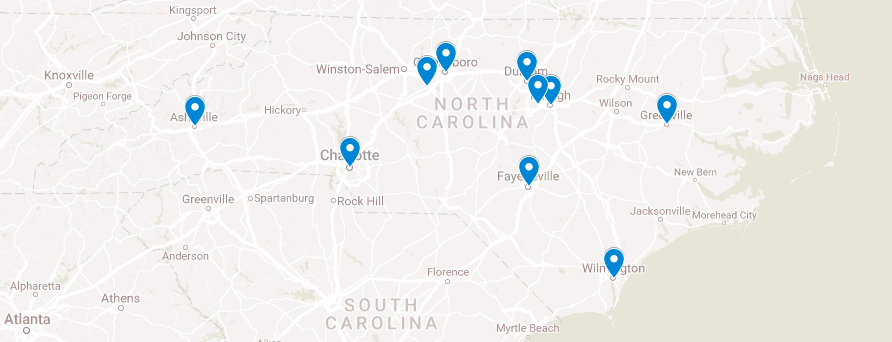

In [34]:
display_png(file = 'image.png')

**Economic differences:**
<br>More tax revenue: on average, 4th-quartile counties collect 11% more tax per capita. 
Higher private-industry wages: Wages are often better in 4th-quartile counties, see Table below. 
Special note: higher-wage jobs shouldn’t be thought of as equally-distributed among a county’s population; differences in factors such as educational disparities and discriminatory hiring can narrow or even eliminate the income-generating options available to any specific resident. See the Omitted Variable Bias section on Racial Bias in Hiring for a discussion of this topic.
The above findings were simply associative at the beginning of our research, yet can illustrate community perceptions related to crime...especially on the campaign trail. And they helped inform our exploratory data analysis.

| Industry | Ratio of industry-low weekly wage in 4th-quartile county vs all counties |
| --- | --- |
| Transportation/utility/communications | 1.7 |
| Manufacturing | 1.64 |
| Services | 1.5 |
| Financial/real estate | 1.45 |
| Trade - Wholesale & Retail | 1.16  | 
| Construction | 1.07 |

Table: 4th quartile (highest crime rate) NC counties actually offer better weekly wages on the lower-end of the earnings spectrum. For *each* industry above, we divide that industry’s lowest weekly wage in any 4th-quartile county by that same industry’s lowest weekly wage in all NC counties - surmising that lower-end legal employment would be the closest alternative to crime. In the services industry, for instance, the lowest weekly wage in a 4th-quartile county was \$199.45 vs \$133.04 in all NC counties. 

### Comparing Counties With High vs. Low Crime Rates
In preparation for the model building process, RTS compared the median values of our key independent variables in counties with high crime rates (4th quartile) against counties with low crime rates (1st quartile). This was accomplished by calculating the percentage change in median values of explanatory variables/covariates in high crime counties (HCR) and low crime counties (LCR) relative to low crime counties. As observed in the outputs, below, we see that the probability of arrest goes down in counties with higher crime. RTS believes that the perception of the certainty of punishment does deter crime, consistent with the scientific literature on the subject. We include this as a key policy recommendation, but caveat that there are other possible reasons why the relationship could be the result of differences in the types of crimes committed - see below. Although, intuitively, this relationship does not come as a surprise, it is important to understand why the probability of arrest is lower in counties with higher crime rate. This could be because the number of offenses are higher in these communities, but could also be due to the types of crimes committed in these counties. For instance, these locations may have a higher frequency of vandalism, which may occur more frequently and may not have any witnesses therefore making an arrest may be more difficult than a robbery. RTS recommends further investigating what types of crimes are being committed and why this ratio is reduced in high crime counties. Similar to probability of arrest, we observed a 30% decrease in the probability of conviction when comparing low crime countries against high crime counties. This, too, makes sense, but understanding whether or not this is an artifact of the effectiveness of the judicial system is important for developing a plan to address this issue. To our surprise, RTS observed a 163% increase in the median values of percent minorities when comparing low crime counties to high crime counties. It is important to acknowledge that these data (from 1980) are not current, but it is unlikely that the percentage of minorities have shifted substantially in a decade. Although RTS acknowledges that incorporating this variable will add some level of unexplainable variance to our model, it is clearly an important contributor to crime rate, and warrants further investigation. Median police per capita values increase by over 64% when moving from low crime counties to high crime counties. This is an interesting find, because intuition would have lead RTS to believe that there would have been a negative relationship here. This is likely because the increase in police force is an artifact of where crime resides rather than how effective NC counties are at combating crime. Despite increasing the police presence in crime ridden communities, we see a decrease in probability of arrest and probability of conviction. Further investigating the relationship between police per capita, probability of arrest, and probability of conviction is highly recommended. When comparing tax per capita of low crime counties against high crime counties we do not see a large change (10%). Although this percentage increase may seem small, it is important to understand the relationship between tax per capita and density. Although tax per capita does not seem higher, the population in a high crime county may be much larger, which would result in a greater amount of money/wealth within a county even though tax per capita may be similar to a low crime, smaller, community. Lastly, we compared the density of low crime counties against high crime counties and found a whopping 224% increase among high crime counties. This finding, paired with tax per capita, may tell an important story about where crime tends to reside, and may be an important puzzle to understanding the genesis of high crime rate counties.

In [35]:
hig.crime = subset(crime_dirty, crmrte > quantile(crime_dirty$crmrte, .75))
low.crime = subset(crime_dirty, crmrte < quantile(crime_dirty$crmrte, .25))

h.tcp = median(hig.crime$taxpc) ; l.tcp = median(low.crime$taxpc)
h.ppc = median(hig.crime$polpc) ; l.ppc = median(low.crime$polpc)
h.den = median(hig.crime$density) ; l.den = median(low.crime$density)
h.min = median(hig.crime$pctmin80) ; l.min = median(low.crime$pctmin80)
h.arr = median(hig.crime$prbarr) ; l.arr = median(low.crime$prbarr)
h.con = median(hig.crime$prbconv); l.con = median(low.crime$prbconv)

paste("(Median LCR prbarr - Median HCR pbarr)/(Median LCR prbarr)*100 =", 
      round((100*(h.arr-l.arr)/l.arr), digits = 2), "%")
paste("(Median LCR prbconv - Median HCR prbconv)/(Median LCR prbconv)*100 =", 
      round((100*(h.con-l.con)/l.con), digits = 2), "%")
paste("(Median LCR pctmin80 - Median HCR pctmin80)/(Median LCR pctmin80)*100 =", 
      round((100*(h.min-l.min)/l.min), digits = 2), "%")
paste("(Median LCR polpc - Median HCR polpc)/(Median LCR polpc)*100 =", 
      round((100*(h.ppc-l.ppc)/l.ppc), digits = 2), "%")
paste("(Median LCR taxpc - Median HCR taxpc)/(Median LCR taxpc)*100 =", 
      round((100*(h.tcp-l.tcp)/l.tcp), digits = 2), "%")
paste("(Median LCR density - Median HCR density)/(Median LCR density)*100 =", 
      round((100*(h.den-l.den)/l.den), digits = 2), "%")

[1] "(Median LCR prbarr - Median HCR pbarr)/(Median LCR prbarr)*100 = -29.55 %"

[1] "(Median LCR prbconv - Median HCR prbconv)/(Median LCR prbconv)*100 = -30.25 %"

[1] "(Median LCR pctmin80 - Median HCR pctmin80)/(Median LCR pctmin80)*100 = 163.69 %"

[1] "(Median LCR polpc - Median HCR polpc)/(Median LCR polpc)*100 = 64.17 %"

[1] "(Median LCR taxpc - Median HCR taxpc)/(Median LCR taxpc)*100 = 9.98 %"

[1] "(Median LCR density - Median HCR density)/(Median LCR density)*100 = 224.08 %"

## Covariates Not Used in Models

### Avgsen
Candidate for Explanatory Variable
Increasing the severity of punishment increases the ‘cost’ of committing a crime and can act as a deterrent. The average sentence proxies for the severity by capturing a common form of punishment. We found that avgsen is not practically or statistically significant in any of our models and not strongly correlated with any of the explanatory variables of interest. As a robustness test, this is also the case when we considered a derived variable to capture the concept of the economic opportunity cost of crime (“wages forgone while incarcerated). A cursory review of the criminology literature also suggests that the severity of punishment is not an effective deterrent. Average sentences may also be underreporting the complete distribution of sentences. Our dataset only contains county-by-county average sentence lengths, which all fall between 5-20 days, much less than the US average at the time (8 months, DOJ). If true, we are unable to credibly estimate the true deterrence effect of average sentence.

### prbpris
Candidate for Explanatory Variable
This variable best approximates the probability of actually incurring a substantial cost (prison) on committing a crime. However, it is not easily observed by the public; a high probability of imprisonment may not be an effective deterrent. Moreover, increasing the probability of imprisonment has clear social impacts and is expensive to implement. Hence, we decide no to evaluate this lever as part of our model. Indeed, we find that prbpris is practically and statistically insignificant in all of the model specifications despite having a low correlation with other variables. Moreover, the estimates are not robust to model specification. 

### pctymle
Candidate for Explanatory Variable
Young males disproportionately account for crime: at the time, nearly 60% of all arrests in the nation were young males from ages 29 and under (FBI Uniform Crime Report). Because any relationship between young males and crime rates is hard to interpret causally, the detection of such a relationship suggests that policy strategies around young adult outreach could be an effective means of combating crime. Ultimately, we found that in various model specifications, pctymle has a large but insignificant coefficient, so we decide not to include it in our analysis. Finally, North Carolina has two of the country’s most populous military bases (Fort Bragg and Camp LeJeune), which are necessarily going to have higher portions of young males than other states may experience. It would be useful for the campaign to fund further research into whether the locations of these bases (and surrounding counties) may be impacted by these federal facilities.

### mix
Candidate for Covariate 
Without knowing whether face-to-face crimes are more severe or more easily caught, the mix variable does not help to reduce omitted variable bias nor does it improve the precision of our explanatory estimates. So we have no ex ante reason to posit a confounding relationship. In our sample, mix is positively correlated with the probability of arrest (it’s easier to identify the offender), but it is not correlated with the overall crime rate. We found that in various model specifications, mix is not practically and statistically significant and do not include it in our policy recommendations or as a possible covariate. 

### wage variables
Candidate for Covariate 
Wages across various industries are a proxy for wealth and income in a given county. This is likely to be a useful covariate as it is likely positively correlated with crime rate (wealthier counties have more opportunities for petty crimes) and positively correlated with the probability of arrest (higher wages imply a more well-funded police force). We decided to omit the wage variables because there is a more parsimonious measure of the same concept - taxpc. Without an understanding of the relative weights of these industries, we cannot use these industry-specific wages to infer the overall income levels within a county. Including a aggregated wage variable would thereby increase attenuation bias. In various specifications all of these wage variables are neither practically nor statistically significant. 